In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

import pymc as pm
import arviz as az

import mpltern
from mpltern.datasets import get_triangular_grid

from tqdm.notebook import tqdm

0it [00:00, ?it/s]

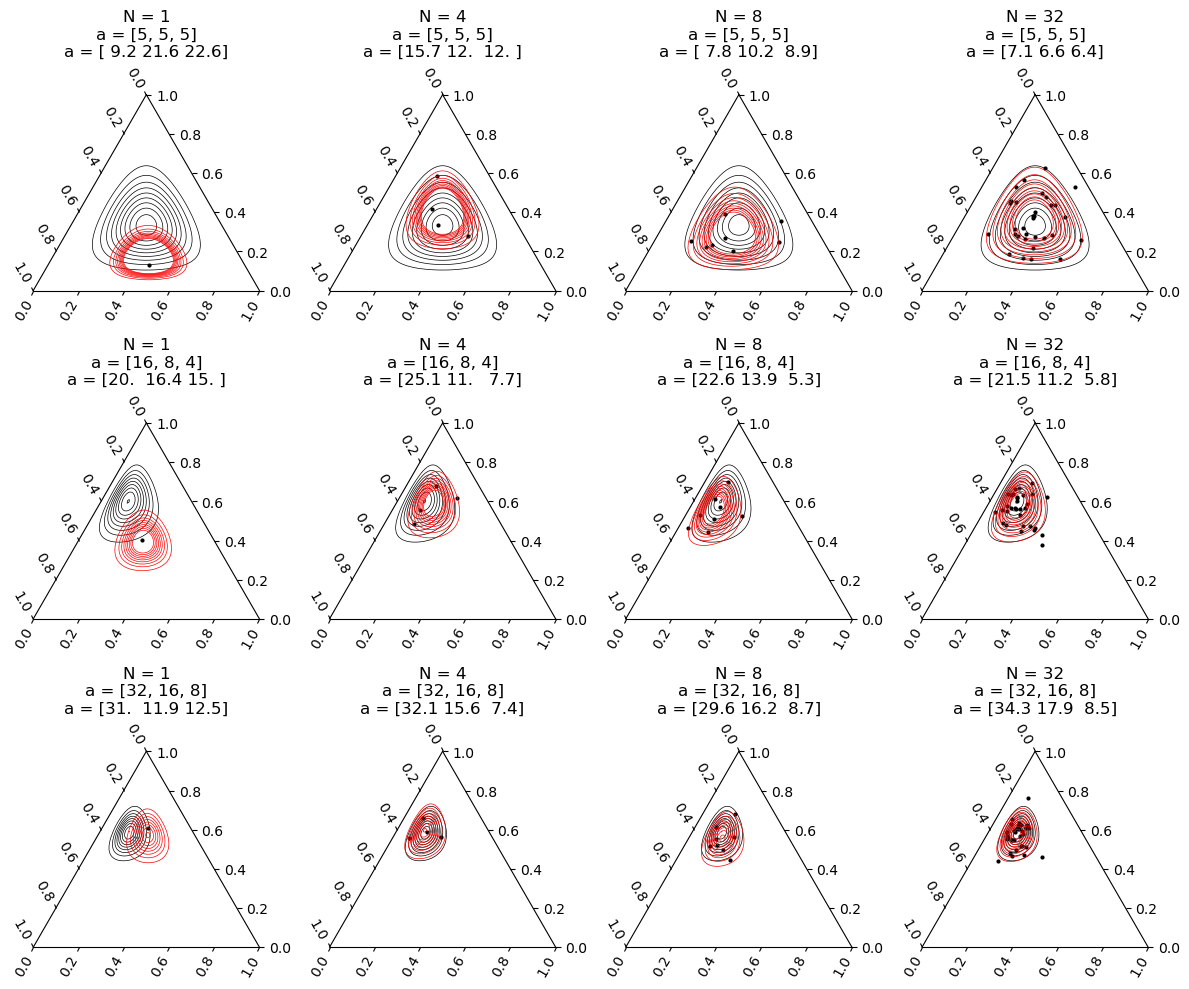

In [2]:
rng = np.random.default_rng(1234)

fig, ax = plt.subplots(3,4,subplot_kw={"projection": "ternary"}, figsize=(12,10))

# 3-components
a3 = [32,16,8]
a2 = [16,8,4]
a1 = [5,5,5]

N_GRID = 101
tn0, tn1, tn2 = get_triangular_grid(N_GRID, 1.e-6)

N_values = [1,4,8,32]
a_values =[a1,a2,a3]
for n,a in tqdm(enumerate(a_values)):
    dist_data = []
    for j in range(tn0.shape[0]):
        dist_data.append(st.dirichlet.pdf([tn0[j],tn1[j],tn2[j]],a))

    levels = np.linspace(0,int(max(dist_data)),10)
    for m,N in enumerate(N_values):

        x = rng.dirichlet(a,size=N)

        ax[n,m].tricontour(tn0, tn1, tn2, dist_data, levels=levels, colors="k", linewidths=0.5)

        _ = ax[n,m].plot(x[:,0],x[:,1],x[:,2],'k.',mew=0)

        with pm.Model() as model:
            a_true = pm.LogNormal("a",3,0.5,shape=(3,))
            x_obs = pm.Dirichlet("x", a=a_true, observed=x)
            mp = pm.find_MAP(progressbar=False)

        try:
            dist_data_est = []
            for j in range(tn0.shape[0]):
                dist_data_est.append(st.dirichlet.pdf([tn0[j],tn1[j],tn2[j]],mp["a"]))
            _ = ax[n,m].tricontour(tn0, tn1, tn2, dist_data_est, levels=levels, colors="r", linewidths=0.5)

        except:
            pass
        ax[n,m].set_title(f"{N = }\n{a = }\na = {np.round(mp['a'],1)}")
fig.tight_layout()
fig.savefig(f"../reports/figures/sample_coverage.png",dpi=300,bbox_inches='tight', pad_inches = 0.01)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],35.959,5.231,26.487,45.766,0.189,0.134,757.0,1126.0,1.0
a[1],18.746,2.743,13.645,23.617,0.099,0.070,765.0,1065.0,1.0
a[2],8.851,1.291,6.589,11.274,0.045,0.032,817.0,1234.0,1.0


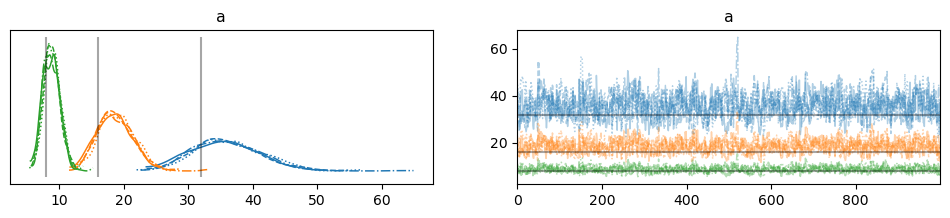

In [3]:
with pm.Model() as model:
    a_true = pm.LogNormal("a",3,0.5,shape=(3,))
    x_obs = pm.Dirichlet("x", a=a_true, observed=x)
    trace = pm.sample()
    
lines = (
    ('a', {}, a),)
    
az.plot_trace(trace,lines=lines)
az.summary(trace)